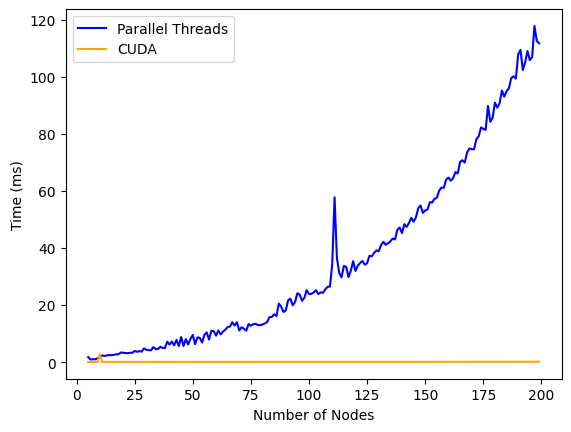

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

threadTable = pd.read_csv("RESULTS/DATA/resultThreadsFINALDONOTDELETE.txt", usecols=[3,7], names=['numNodes', 'time'])
groupedData = threadTable.groupby(['numNodes'], as_index=False).mean()
cudaTable = pd.read_csv("RESULTS/DATA/resultCudaFINALDONOTDELETE.txt", usecols=[3,7], names=['numNodes', 'time'])
cudaTable  = cudaTable.groupby(['numNodes'], as_index=False).mean()

plt.plot(groupedData["numNodes"], groupedData["time"], label="Parallel Threads", color="blue")
plt.plot(cudaTable["numNodes"], cudaTable["time"], label="CUDA", color="orange")
plt.xlabel("Number of Nodes")
plt.ylabel("Time (ms)")
plt.legend()
plt.savefig("RESULTS/PLOTS/threadcudaComparison.png")
plt.show()

